In [14]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
import random
import sys
import cv2


def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,50,0])#0,50,0
    hsv_max = np.array([30,255,0])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([30,175,150])
    hsv_max = np.array([20,255,250])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2

def main():
    #camera = picamera.PiCamera()
    #camera.resolution=(600,600)
    for i in range(1,51,1):
        #camera.capture('./redcorn/'+i+'.png')#take picture
        image1 = cv2.imread('./new2/'+str(i)+'.jpg')
        #image1=cv2.resize(image1,(600,600))
        image = cv2.GaussianBlur(image1,(15,15),13)#delete white noise
        mono_src=red_detect(image)
        cv2.imwrite('./new2-binarization/'+str(i)+'.jpg',mono_src)
        
if __name__ == '__main__':
    main()
    print("finish")



finish


In [6]:

#!/usr/bin/env python
        # -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
import random
import sys
import cv2
import time

def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,50,0])
    hsv_max = np.array([0,250,0])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([0,170,150])
    hsv_max = np.array([20,255,255])#(90,255,255)でうまくいったけどmaxが255じゃないっぽい
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    return mask1 + mask2



def main():
   
    for j in range(1,51,1):
        image1 = cv2.imread('./colorcorn/'+str(j)+'.jpg')
        #image1 = cv2.imread('./test1.jpeg')
        #image = cv2.GaussianBlur(image1,(5,5),3)#delete white noise
        image = cv2.GaussianBlur(image1,(21,21),15)#delete white noise
        mono_src=red_detect(image) 
        cv2.imshow('RED_DETECT',mono_src)
        color_src01 = cv2.cvtColor(mono_src, cv2.COLOR_GRAY2BGR)
        color_src02 = cv2.cvtColor(mono_src, cv2.COLOR_GRAY2BGR)
        label = cv2.connectedComponentsWithStats(mono_src) #make array to get imformation
        if label:
            n = label[0] - 1
            data = np.delete(label[2], 0, 0)
            center = np.delete(label[3], 0, 0)
            #print(label[3])
        for i in range(n):
            x0 = data[i][0]
            y0 = data[i][1]
            x1 = data[i][0] + data[i][2]
            y1 = data[i][1] + data[i][3]
            cv2.rectangle(color_src01, (x0, y0), (x1, y1), (0, 0, 255))
            cv2.rectangle(color_src02, (x0, y0), (x1, y1), (0, 0, 255))
            cv2.putText(color_src01, "ID: " +str(i + 1), (x1 - 20, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))
            cv2.putText(color_src01, "S: " +str(data[i][4]), (x1 - 20, y1 + 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))
            cv2.putText(color_src02, "X: " + str(int(center[i][0])), (x1 - 30, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))
            cv2.putText(color_src02, "Y: " + str(int(center[i][1])), (x1 - 30, y1 + 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))

        # 結果の表示
        #v2.imshow("color_src01", color_src01)
        #cv2.imshow("color_src02", color_src02)
        #print(label[2])
        #print(label[3])
        #cv2.destroyAllWindow
        cv2.imwrite('./a/'+str(j)+'.jpg',color_src02)

    print("finish")
            
    

if __name__ == '__main__':
    main()


finish


In [18]:

#!/usr/bin/env python
        # -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
import random
import sys
import cv2
import time

def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,50,0])
    hsv_max = np.array([0,250,0])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([0,170,150])
    hsv_max = np.array([20,255,255])#(90,255,255)でうまくいったけどmaxが255じゃないっぽい
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    return mask1 + mask2



def main():
   
    for j in range(1,26,1):
        image1 = cv2.imread('./corn/'+str(j)+'.jpg')
        #image1 = cv2.imread('./test1.jpeg')
        #image = cv2.GaussianBlur(image1,(5,5),3)#delete white noise
        image = cv2.GaussianBlur(image1,(3,3),1)#delete white noise
        mono_src=red_detect(image) 
        cv2.imshow('RED_DETECT',mono_src)
        color_src01 = cv2.cvtColor(mono_src, cv2.COLOR_GRAY2BGR)
        color_src02 = cv2.cvtColor(mono_src, cv2.COLOR_GRAY2BGR)
        label = cv2.connectedComponentsWithStats(mono_src) #make array to get imformation
        if label:
            n = label[0] - 1
            data = np.delete(label[2], 0, 0)
            center = np.delete(label[3], 0, 0)
            #print(label[3])dddddddddddddddddd
        for i in range(n):
            x0 = data[i][0]
            y0 = data[i][1]
            x1 = data[i][0] + data[i][2]
            y1 = data[i][1] + data[i][3]
            cv2.rectangle(color_src01, (x0, y0), (x1, y1), (0, 0, 255))
            cv2.rectangle(color_src02, (x0, y0), (x1, y1), (0, 0, 255))
            cv2.putText(color_src01, "ID: " +str(i + 1), (x1 - 20, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))
            cv2.putText(color_src01, "S: " +str(data[i][4]), (x1 - 20, y1 + 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))
            cv2.putText(color_src02, "X: " + str(int(center[i][0])), (x1 - 30, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))
            cv2.putText(color_src02, "Y: " + str(int(center[i][1])), (x1 - 30, y1 + 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))

        cv2.imwrite('./b/'+str(j)+'.jpg',color_src02)

    print("finish")
            
    

if __name__ == '__main__':
    main()


finish


In [17]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-



#ダメダメダメダメm

import time
#import picamera
import numpy as np
import random
import sys
import cv2


def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,50,0])#0,50,0
    hsv_max = np.array([30,255,0])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([30,175,0])
    hsv_max = np.array([255,255,250])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2

def main():
    #camera = picamera.PiCamera()
    #camera.resolution=(600,600)
    for i in range(1,26,1):
        #camera.capture('./corn/'+i+'.png')#take picture
        image1 = cv2.imread('./corn/'+str(i)+'.jpg')
        #image1=cv2.resize(image1,(600,600))
        image = cv2.GaussianBlur(image1,(15,15),13)#delete white noise
        mono_src=red_detect(image)
        cv2.imwrite('./prior/'+str(i)+'.jpg',mono_src)
        
if __name__ == '__main__':
    main()
    print("finish")



finish


In [8]:
%%time
import cv2
import numpy as np

print("nkdklgfasklfjasdklj")
i=1
size=(500,500)
while(i<26):
    img=cv2.imread("./hattoricorn/"+str(i)+".jpg")
    img=cv2.resize(img,size)
    src=cv2.pyrMeanShiftFiltering(img,sp=30,sr=30,maxLevel=3)
    cv2.imwrite("./mean3-hattoricorn/"+str(i)+".jpg",src)
    i=i+1
print("hello")

nkdklgfasklfjasdklj
hello


True

In [17]:
%%time
# !/usr/bin/env python
# -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
import random
import sys
import cv2


def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,50,50])#0,50,0
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([170,50,50])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2

def main():
    #camera = picamera.PiCamera()
    #camera.resolution=(600,600)
    for i in range(1,26,1):
        #camera.capture('./redcorn/'+i+'.png')#take picture
        image1 = cv2.imread('./mean3-hattoricorn/'+str(i)+'.jpg')
        #image1=cv2.resize(image1,(600,600))
        image = cv2.GaussianBlur(image1,(15,15),13)#delete white noise
        mono_src=red_detect(image)
        cv2.imwrite('./mean3-hattoricorn-binarization/'+str(i)+'.jpg',mono_src)
        
if __name__ == '__main__':
    main()
    print("finish")



finish
Wall time: 513 ms


In [32]:
%%time
# !/usr/bin/env python
# -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
import random
import sys
import cv2


def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,55,80])#0,50,0
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([160,110,80])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2

def main():
    size=(500,500)
    #camera = picamera.PiCamera()
    #camera.resolution=(600,600)
    for i in range(1,26,1):
        #camera.capture('./redcorn/'+i+'.png')#take picture
        image1 = cv2.imread('./hattoricorn/'+str(i)+'.jpg')
        image1=cv2.resize(image1,size)
                

        #image1=cv2.resize(image1,(600,600))
        image = cv2.GaussianBlur(image1,(5,5),3)#delete white noise
        mono_src=red_detect(image)
        cv2.imwrite('./meannot-hattoricorn-binarization/'+str(i)+'.jpg',mono_src)
        
if __name__ == '__main__':
    main()
    print("finish")



finish
Wall time: 11.5 s


In [53]:
%%time
# !/usr/bin/env python
# -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
import random
import sys
import cv2


def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,55,80])#0,50,0
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([160,110,80])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2

def main():
    size=(500,500)
    #camera = picamera.PiCamera()
    #camera.resolution=(600,600)
    for i in range(1,51,1):
        #camera.capture('./redcorn/'+i+'.png')#take picture
        image1 = cv2.imread('./colorcorn/'+str(i)+'.jpg')
        image1=cv2.resize(image1,size)
                

        #image1=cv2.resize(image1,(600,600))
        image = cv2.GaussianBlur(image1,(11,11),5)#delete white noise
        mono_src=red_detect(image)
        cv2.imwrite('./colorcorn-binarization/'+str(i)+'.jpg',mono_src)
        
if __name__ == '__main__':
    main()
    print("finish")



finish
Wall time: 130 ms


In [54]:
%%time
# !/usr/bin/env python
# -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
import random
import sys
import cv2


def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,55,80])
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([160,110,80])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2

def main():
    size=(500,500)
    #camera = picamera.PiCamera()
    #camera.resolution=(600,600)
    for i in range(1,51,1):
        #camera.capture('./redcorn/'+i+'.png')#take picture
        image1 = cv2.imread('./kano-corn/20d/21-'+str(i)+'.jpg')
       # image1=cv2.resize(image1,size)
                

        #image1=cv2.resize(image1,(600,600))
        #image1 = cv2.GaussianBlur(image1,(5,5),3)#delete white noise
        mono_src=red_detect(image1)
        cv2.imwrite('./kano-corn/20d/21-'+str(i)+'-binarization.jpg',mono_src)
        
if __name__ == '__main__':
    main()
    print("finish")



finish
Wall time: 90.8 ms


In [47]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

# 入力画像の読み込み
img = cv2.imread("./mean3-hattoricorn-binarization/1.jpg")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h,w=gray.shape
gray=np.pad(gray,((int(0.2*h),int(0.2*h)),(int(0.2*w),int(0.2*w))),'constant')
h,w=gray.shape

theta = 45  # 回転角
scale = 1.0    # 回転角度・拡大率

# 画像の中心座標
oy, ox = int(gray.shape[0]/2), int(gray.shape[1]/2)

# 方法2(OpenCV)
R = cv2.getRotationMatrix2D((ox, oy), theta, scale)    # 回転変換行列の算出
dst = cv2.warpAffine(gray, R, (w,h))    # アフィン変換
print(gray.shape)

print(dst.shape)

# 結果を出力
cv2.imwrite("./rotate/1.png", dst)
print("finish")

(896, 672)
(896, 672)
finish


In [1]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

# アフィン変換で画像配列の回転
def rotate_affine(src, theta):
    # 元画像のサイズを取得
    h, w = src.shape[0], src.shape[1]

    # 出力画像用の配列生成（要素は全て0）
    dst = np.zeros((2*(1+int(np.sqrt((h/2)*(h/2)+(w/2)*(w/2)))),2*(1+int( np.sqrt((h/2)*(h/2)+(w/2)*(w/2))))))
    print(dst.shape)

    # degreeかｒradianに変換
    rd = np.radians(theta)


    # アフィン変換
    for y in range(0, h):
        for x in range(0, w):
            xi = (x - int(w/2))*np.cos(rd) - (y - int(h/2))*np.sin(rd) + int(w/2)
            yi = (x - int(w/2))*np.sin(rd) + (y - int(h/2))*np.cos(rd) + int(h/2)
            xi = int(xi)
            yi = int(yi)

            # 変換後の座標が範囲外でなければ出力画像配列に画素値を代入
            #if yi < h - 1 and xi < w - 1 and yi > 0 and xi > 0:
             #   dst[y][x] = src[yi][xi]
            dst[y][x] = src[yi][xi]

    return dst

# 入力画像の読み込み
img = cv2.imread("./hattoricorn/8.JPG")
print("ok")
    
# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

theta = 45  # 回転角

# 方法(NumPy）
dst = rotate_affine(gray, theta)

# 結果を出力
cv2.imwrite("./meannot-hattoricorn-binarization/a3.jpg", dst)
print("finish")

ok
(5042, 5042)


IndexError: index 3024 is out of bounds for axis 0 with size 3024

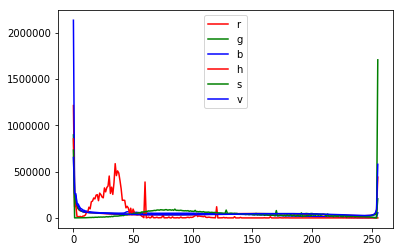

In [7]:
import cv2
import matplotlib.pyplot as plt
def show_img(path):

    img = cv2.imread(path)
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    plt.plot(hist_r, color='r', label="r")
    plt.plot(hist_g, color='g', label="g")
    plt.plot(hist_b, color='b', label="b")
    plt.legend()
    #plt.show() 
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.plot(hist_s, color='g', label="s")
    plt.plot(hist_v, color='b', label="v")
    plt.legend()
    plt.show()

    return hist_r,hist_g, hist_b, hist_h, hist_s, hist_v

r,g,b,h,s,v = show_img("./hattoricorn/7.JPG")

NameError: name 'sqrt' is not defined

In [1]:
import cv2
import numpy as np
import math

img = cv2.imread('./hattoricorn/8.JPG')

h, w, c = img.shape
print(h, w, c)
# 225 400 3
mat = cv2.getRotationMatrix2D((w / 2, h / 2), 45, 0.5)
print(mat)
# [[  0.35355339   0.35355339  89.51456544]
#  [ -0.35355339   0.35355339 143.43592168]]
affine_img = cv2.warpAffine(img, mat, (w, h))
cv2.imwrite('./binarization/opencv_affine.jpg', affine_img)
#affine_img_half = cv2.warpAffine(img, mat, (w, h // 2))
#cv2.imwrite('data/dst/opencv_affine_half.jpg', affine_img_half)
affine_img_flags = cv2.warpAffine(img, mat, (w, h), flags=cv2.INTER_CUBIC)
cv2.imwrite('./hattoricorn/opencv_affine_flags.jpg', affine_img_flags)
print(img.shape)
print(affine_img_flags.shape)
print(affine_img.shape)
print(type(img))

4032 3024 3
[[ 3.53553391e-01  3.53553391e-01  2.64663638e+02]
 [-3.53553391e-01  3.53553391e-01  1.83780909e+03]]
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
<class 'numpy.ndarray'>


In [40]:
import numpy as np

a=[[1,2,3],[4,5,6]]
a=np.array(a)
a=np.pad(a,((3,3),(4,4)),'constant')
print(a)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 3 0 0 0 0]
 [0 0 0 0 4 5 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [50]:
import numpy as np
import cv2

img=cv2.imread("./mean3-hattoricorn-binarization/19.jpg")
num = np.count_nonzero(img)
print(num)
print(img.size)

1251
921600


In [52]:
import numpy as np
import cv2

img=cv2.imread("./mean3-hattoricorn-binarization/5.jpg")
num = np.count_nonzero(img)
print(num)
print(img.size)
print(num/img.size)

822522
921600
0.8924934895833333


In [3]:
import numpy as np
a=np.array([1,2,3,4,5])

def ite(array):
    print(array)
    
ite(a)

[1 2 3 4 5]


In [6]:
import numpy as np

a=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a.sum(axis=0))
print(a)

[12 15 18]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
import numpy as np
a=np.array([1,2,3,4,5,6,7,8,9])
b=np.array_split(a,3)
c=np.array([np.sum(b[i]) for i in range(3)])
print(c)

[ 6 15 24]


In [58]:
%%time
# !/usr/bin/env python
# -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
#import random
import sys
import cv2
import csv
"""
この関数はカメラ撮影とバイナリ化（二値化処理）した画像の配列を返すものです．
確認し忘れていましたが，0 or 255　のデータです．
面積の求め方はnonzeroを使う方法です．
255を1にする方法もあるのでそちらでも良いです・

引数はいりません．返り値として二値化した配列とtrue　or falseを返します．
"""
"""
def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,50,50])#0,50,0
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([170,50,50])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2
"""

def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,55,80])#0,50,0
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([160,110,80])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2
"""

def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,55,80])
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([160,110,80])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2
"""


def capture(i):
    #初期設定なので関数内に入れる必要はないです．
    #camera=picamera.PiCamera()
    #camera.resolution(1200,1200)
    #ここから関数

    """
    引数のところに保存する名前を入れてください
    関数内でループをさせていないので，写真を保存するのであれば名前を変える必要があります．
    私が良くやるのはループの回数を名前にする方法です．
    "./"+src(i)+".jpg"などです．
    
    """
    size=(3200,2400)
    image1=cv2.imread("./hattoricorn/"+str(i)+".jpg")
    #camera.capture("./a.jpg")
    #保存した画像の読み込みです．保存しない方が早いかもしれないので変更してもよいかも
    #image1=cv2.imread("./a.jpg")
    #ノイズ処理です．ただ，csvが割と感度が良いのでいらないかもしれないです．
    image1=cv2.resize(image1,size)
    #image1 = cv2.GaussianBlur(image1, (5, 5), 3)  
    #別に定義された関数を用いています．やろうと思えば一つの関数になると思いますが高級関数的な使い方になるのでやめました．
    mono_src = red_detect(image1)
    #0じゃない値の数を数えます．（結局面積を求めていることと同じ．単位はピクセル）
    num = np.count_nonzero(mono_src)
    cv2.imwrite("./hattorik/"+str(i)+".jpg",mono_src)
    scale = num/3200/2400
    if scale >=0.8:
        bi = True
    else:
        bi =False

    return mono_src,bi

def convert(array,theta,scale=1.0):
    h,w=array.shape
    #array_pad = np.pad(array, ((int(0.2*h), int(0.2*h)),(int(0.2*w), int(0.2*w))), 'constant')
    array_pad = np.pad(array,((1300,1300),(900,900)),"constant")
    print(array_pad.shape)
    oy, ox = int(array_pad.shape[0]/2), int(array_pad.shape[1]/2)
    R = cv2.getRotationMatrix2D((ox, oy), theta, scale)  
    dst = cv2.warpAffine(array_pad, R, (5000, 5000))    # アフィン変換
    cv2.imwrite("./hattorik/"+str(i)+".png", dst)
    array_sum = dst.sum(axis=0)
    #array_div = [array_sum[:900],array_sum[901:4099],array_sum[4100:]]
    ar1=np.sum(array_sum[:900])
    ar2=array_sum[900:4100]
    ar3=np.sum(array_sum[4100:])
    array_divide = np.array_split(ar2,20)
    array_select = np.array([np.sum(array_divide[i]) for i in range(20)])
    array_select[0] = array_select[0]+ar1
    array_select[19] = array_select[19]+ar3
    array_index = np.argmax(array_select)
    return array_index/19


        
if __name__ == '__main__':
    with open("a.csv","w") as f:
        writer = csv.writer(f, lineterminator='\n')
        for i in range(1,25,1):
            array,judge=capture(i)
            if judge==True:
                print("finish")
            select = convert(array,-10)
            writer.writerow([i,select])
        
        
    



(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
finish
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
(5000, 5000)
Wall time: 18.3 s


In [42]:
import numpy as np
a=np.array([1,2,3,4])
a[0]=a[0]+4
print(a)

[5 2 3 4]


In [68]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-

import time
#import picamera
import numpy as np
#import random
import sys
import cv2
import csv

"""
def red_detect(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,50,50])#0,50,0
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([170,50,50])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2
"""

def red_detect(img):

    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv_min = np.array([0,55,80])#0,50,0
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    hsv_min = np.array([160,110,80])
    hsv_max = np.array([180,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)
    return mask1 + mask2



def capture(i):


    #初期設定なので関数内に入れる必要はないです．
    #camera=picamera.PiCamera()
    #camera.resolution(1200,1200)
    #ここから関数

    size=(3200,2400)
    image1=cv2.imread("./hattoricorn/"+str(i)+".jpg")
    #camera.capture("./a.jpg")
    #保存した画像の読み込みです．保存しない方が早いかもしれないので変更してもよいかも
    #image1=cv2.imread("./a.jpg")
    #ノイズ処理です．ただ，csvが割と感度が良いのでいらないかもしれないです．
    image1=cv2.resize(image1,size)
    #image1 = cv2.GaussianBlur(image1, (5, 5), 3)  
    #別に定義された関数を用いています．やろうと思えば一つの関数になると思いますが高級関数的な使い方になるのでやめました．
    mono_src = red_detect(image1)
    #0じゃない値の数を数えます．（結局面積を求めていることと同じ．単位はピクセル）
    num = np.count_nonzero(mono_src)
    #画像を保存する関数，引数は保存する名前になる
    cv2.imwrite("./hattorik/"+str(i)+".jpg",mono_src)
    #終了判定
    scale = num/3200/2400
    if scale >=0.8:
        bi = True
    else:
        bi =False

    return mono_src,bi,scale

def convert(array,theta,scale=1.0):

    num_devide = 20
    h,w=array.shape
    array_pad = np.pad(array,((1300,1300),(900,900)),"constant")
    oy, ox = int(array_pad.shape[0]/2), int(array_pad.shape[1]/2)
    R = cv2.getRotationMatrix2D((ox, oy), theta, scale)  
    dst = cv2.warpAffine(array_pad, R, (5000, 5000))    # アフィン変換
    cv2.imwrite("./hattorik/"+str(i)+".png", dst)
    array_sum = dst.sum(axis=0)
    ar1=np.sum(array_sum[:900])
    ar2=array_sum[900:4100]
    ar3=np.sum(array_sum[4100:])
    array_divide = np.array_split(ar2,num_devide)
    array_select = np.array([np.sum(array_divide[i]) for i in range(num_devide)])
    array_select[0] = array_select[0]+ar1
    array_select[num_devide-1] = array_select[num_devide-1]+ar3
    array_index = np.argmax(array_select)
    return array_index/(num_devide-1)


        
if __name__ == '__main__':
    with open("a.csv","w") as f:
        writer = csv.writer(f, lineterminator='\n')
        for i in range(1,25,1):
            array,judge,num=capture(i)
            if judge==True:
                print("finish")
            select = convert(array,0)
            writer.writerow([i,select,num*100])
        
        
    



finish
